# New Analysis

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
store = pd.read_csv('stores.csv')

In [65]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [66]:
test = pd.read_csv('test.csv')
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [67]:
datset = pd.read_csv('train.csv')
datset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [68]:
features = pd.read_csv('features.csv')
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [70]:
df = train.merge(store, how = 'left').merge(features, how = 'left')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


## Data manipulation

### Checkin for null values

In [71]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [72]:
# As we can see the markdown columns having NaN values we replace them with 0. 
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)

In [73]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


In [75]:
# Analysis of time series is commercially importance because of industrial need and 
#relevance especially w.r.t forecasting.

df = df.sort_values(by = 'Date')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064


In [76]:
df.shape

(421570, 16)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Type            421570 non-null object
Size            421570 non-null int64
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       421570 non-null float64
MarkDown2       421570 non-null float64
MarkDown3       421570 non-null float64
MarkDown4       421570 non-null float64
MarkDown5       421570 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [86]:
# Frequency of different type of store
df['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [88]:
df['Type'].value_counts().sum()

421570

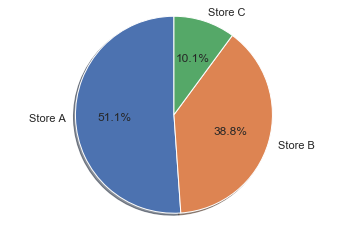

In [89]:
labels = 'Store A', 'Store B', 'Store C'

sizes = [((215478 / 421570) * 100), ((163495/ 421570) * 100), ((42597/ 421570) * 100)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

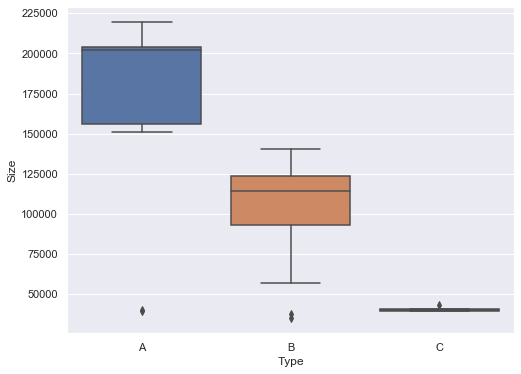

In [91]:
# boxplot for sizes of types of stores
store_type = pd.concat([store['Type'], store['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

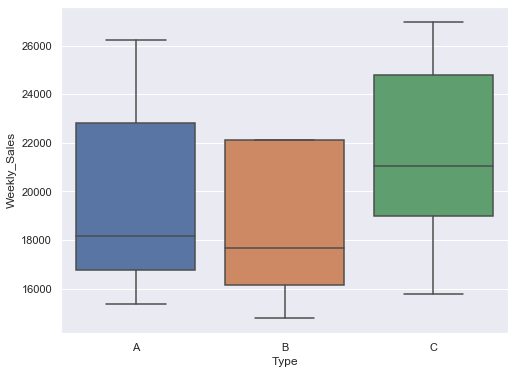

In [101]:
# the sales on store based on weeks
store_sale = pd.concat([store['Type'], df['Weekly_Sales']], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = 'Type', y = 'Weekly_Sales', data = store_sale, showfliers=False)
#stores with more sizes have higher sales

In [103]:
# sale on the basis of holidays and non holidays
print('sales on non holidays: ', df[df['IsHoliday'] == False]
      ['Weekly_Sales'].count().round(1))

print('Sales on holidays: ', df[df['IsHoliday']== True]['Weekly_Sales'].count().round(1))

sales on non holidays:  391909
Sales on holidays:  29661


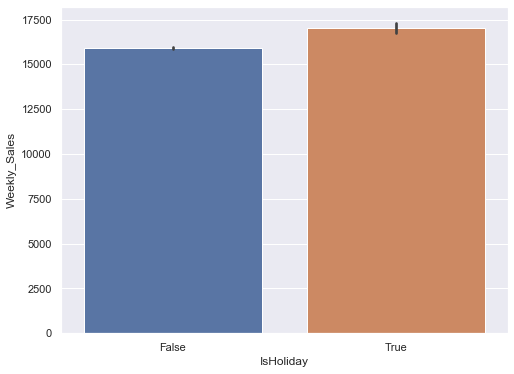

In [107]:
store_sale_holiday = pd.concat([df['IsHoliday'], df['Weekly_Sales']], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.barplot(x = 'IsHoliday', y = 'Weekly_Sales', data = store_sale_holiday)

[]

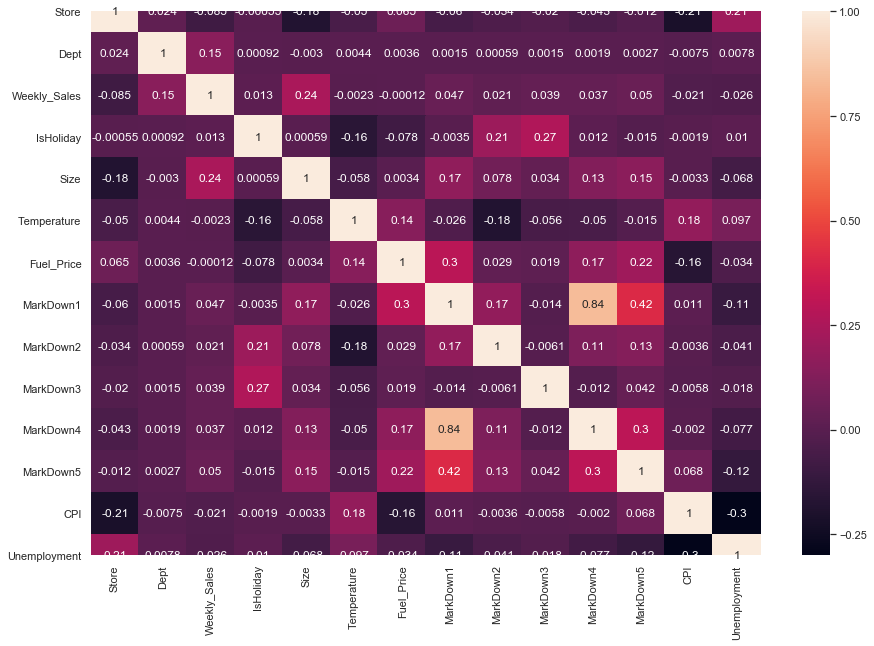

In [108]:
# coorelation among all the features
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

In [131]:
# Analysis involving dates
df['Year'] = pd.to_datetime(df['Date'],format="%Y-%m-%d").dt.year
df['Month'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.month
df['Day'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d').dt.day
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
277665,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5
277808,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5
277951,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5
278094,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5


In [132]:
 X = df.drop(['Weekly_Sales', 'Date'], 1)

In [133]:
X.head()

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,1,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
277665,29,5,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5
277808,29,6,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5
277951,29,7,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5
278094,29,8,False,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5


In [143]:
dummy = pd.get_dummies(X.Type)

In [144]:
dummy

,A,B,C
0,1,0,0
277665,0,1,0
277808,0,1,0
277951,0,1,0
278094,0,1,0
...,...,...,...
379648,1,0,0
181170,1,0,0
181313,1,0,0
181599,1,0,0


In [145]:
X = pd.concat([X, dummy], axis=1)
X = X.drop(columns='Type')

In [146]:
X.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,A,B,C
0,1,1,False,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,1,0,0
277665,29,5,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,0,1,0
277808,29,6,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,0,1,0
277951,29,7,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,0,1,0
278094,29,8,False,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,2010,2,5,0,1,0


In [147]:
y = df['Weekly_Sales']

In [148]:
y.head()

0         24924.50
277665    15552.08
277808     3200.22
277951    10820.05
278094    20055.64
Name: Weekly_Sales, dtype: float64

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

In [151]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [152]:
## KNN Regressor

In [153]:
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [155]:
import sklearn.metrics as metrics
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = knn.score(X_test, y_test)
print(accuracy)

12532.501565564437
422847438.42911136
20563.254568017957
0.19282919639642104


In [156]:
## Decision tree Regessor

In [157]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [158]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = dt.score(X_test, y_test)
print(accuracy)

1856.362662784354
25756384.588118773
5075.074835716097
0.9508338001924542


In [159]:
## Random Forest Regressor

In [161]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [163]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = rfr.score(X_test, y_test)
print(accuracy)

1958.8685872233677
21413760.829117395
4627.500494772247
0.9591234072486614


In [167]:
### ExtraTreesRegressor

In [168]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

In [169]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = etr.score(X_test, y_test)
print(accuracy)

1428.839555407959
15897769.992819902
3987.2007715714417
0.9696528473052094


In [173]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "MAE","MSE", "RMSE", "Accuracy"]

x.add_row(["KNNRegressor", 12532.50, 422847438.43,20563.25, 19.28])
x.add_row(["DecisionTreeRegressor", 1856.36,25756384.59,5075.07,95.08])
x.add_row(["RandomForestRegressor", 1958.87, 21413760.83, 4627.50, 95.91])
x.add_row(["ExtraTreeRegressor", 1428.84,15897769.99,3987.20,96.96])

print(x)

+-----------------------+---------+--------------+----------+----------+
|         Model         |   MAE   |     MSE      |   RMSE   | Accuracy |
+-----------------------+---------+--------------+----------+----------+
|      KNNRegressor     | 12532.5 | 422847438.43 | 20563.25 |  19.28   |
| DecisionTreeRegressor | 1856.36 | 25756384.59  | 5075.07  |  95.08   |
| RandomForestRegressor | 1958.87 | 21413760.83  |  4627.5  |  95.91   |
|   ExtraTreeRegressor  | 1428.84 | 15897769.99  |  3987.2  |  96.96   |
+-----------------------+---------+--------------+----------+----------+
